In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


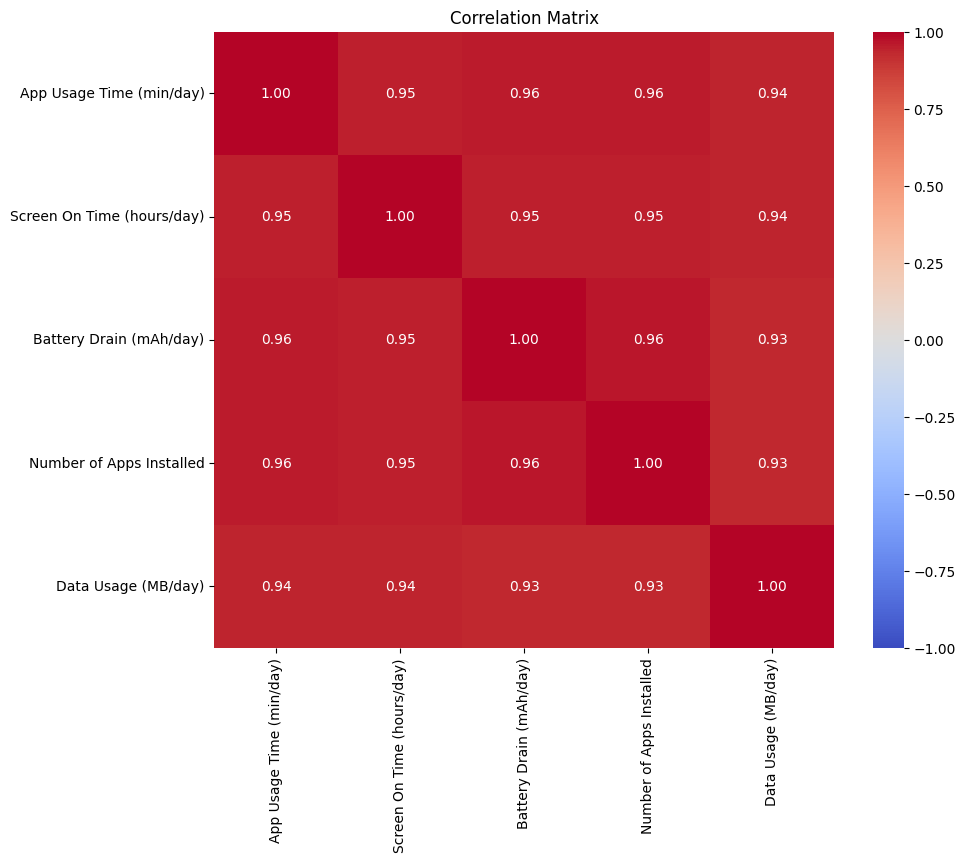

In [ ]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(['User ID', 'User Behavior Class', 'Age'], axis=1)

# Buat matriks korelasi
correlation_matrix = numerical_df.corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

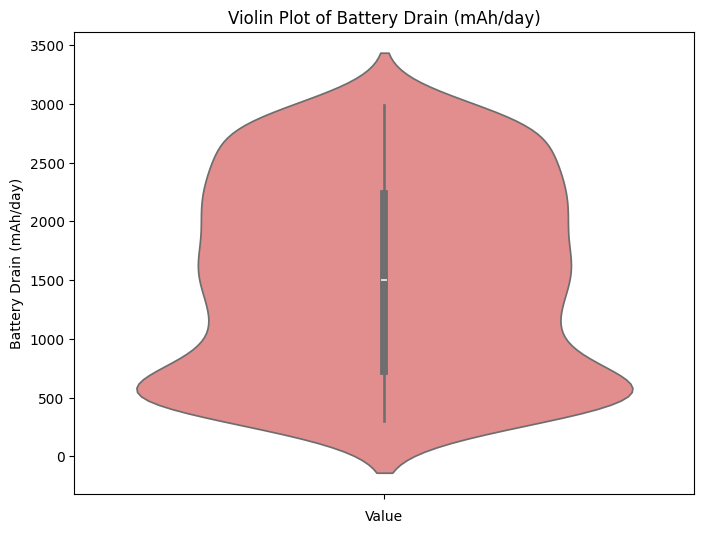

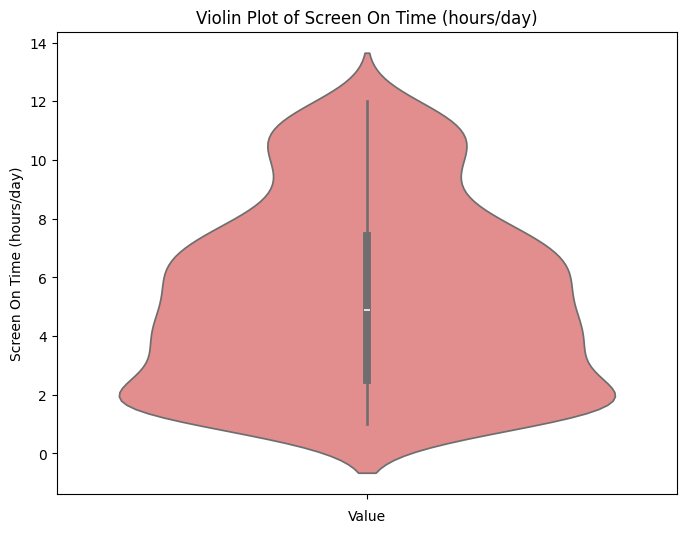

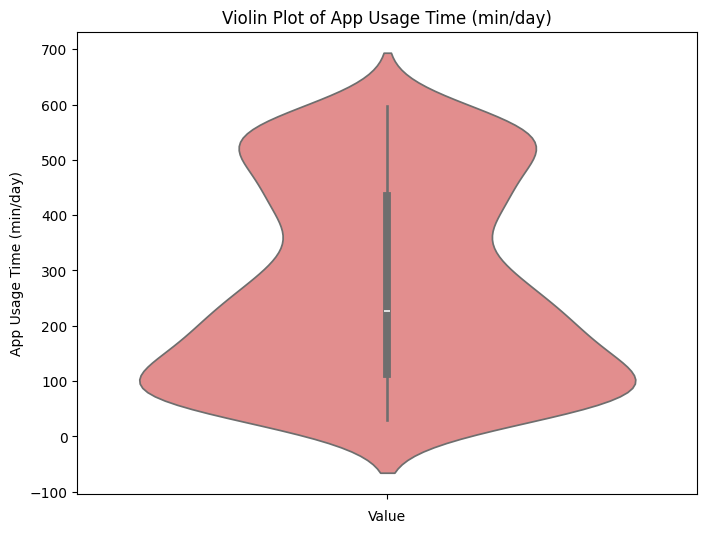

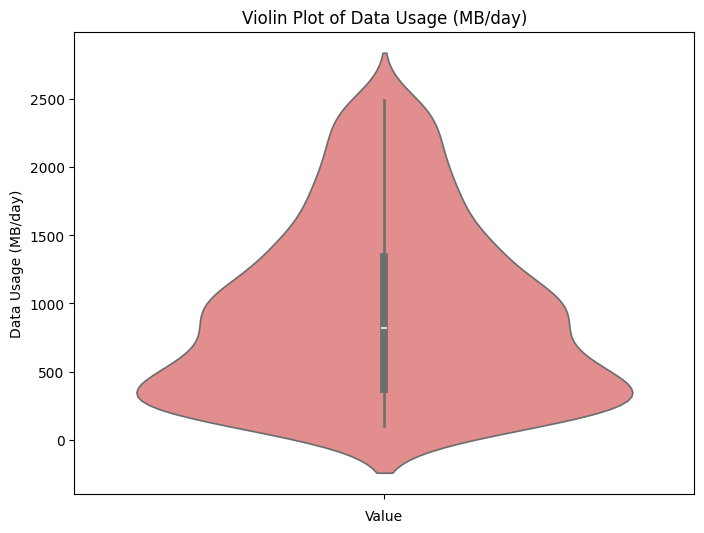

In [ ]:
cols_to_plot = ['Battery Drain (mAh/day)', 'Screen On Time (hours/day)', 'App Usage Time (min/day)', 'Data Usage (MB/day)']

for col in cols_to_plot:
    plt.figure(figsize=(8, 6))
    sns.violinplot(y=df[col], color='lightcoral')
    plt.title(f'Violin Plot of {col}')
    plt.xlabel('Value')
    plt.ylabel(col)
    plt.show()

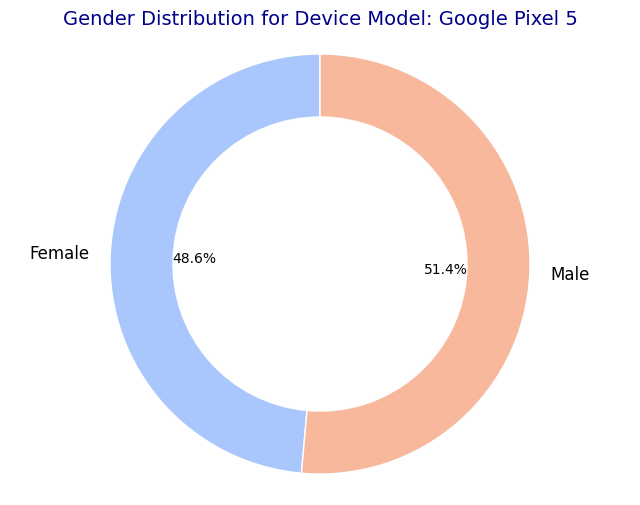

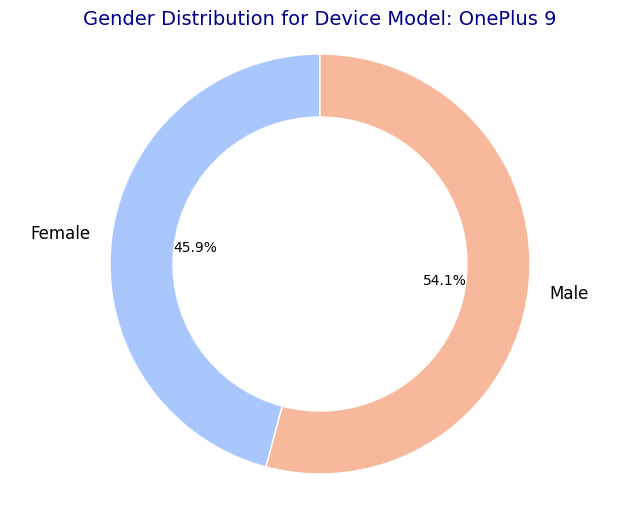

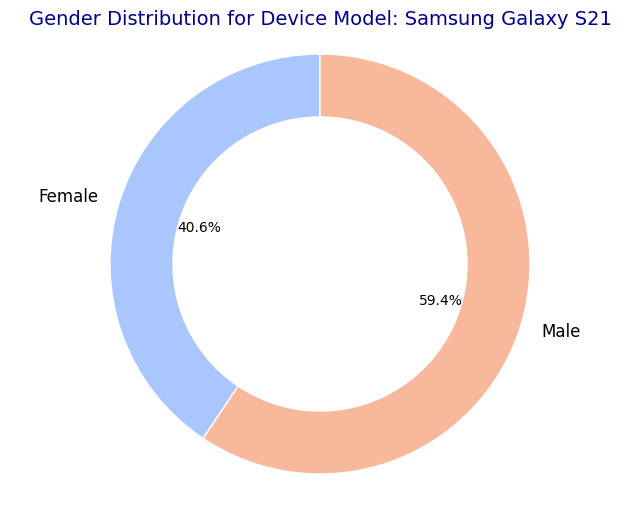

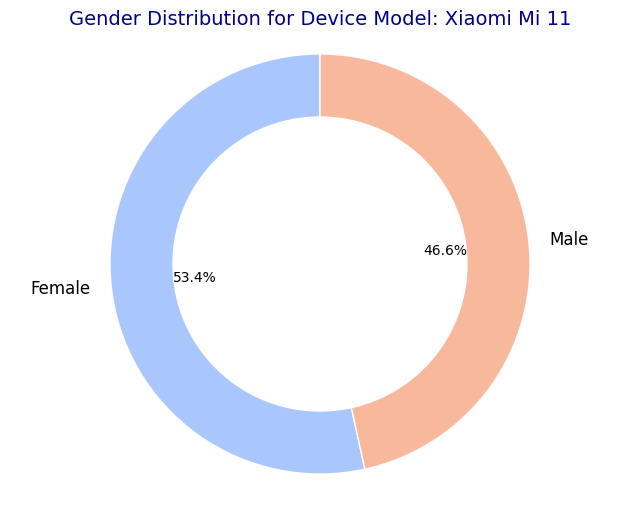

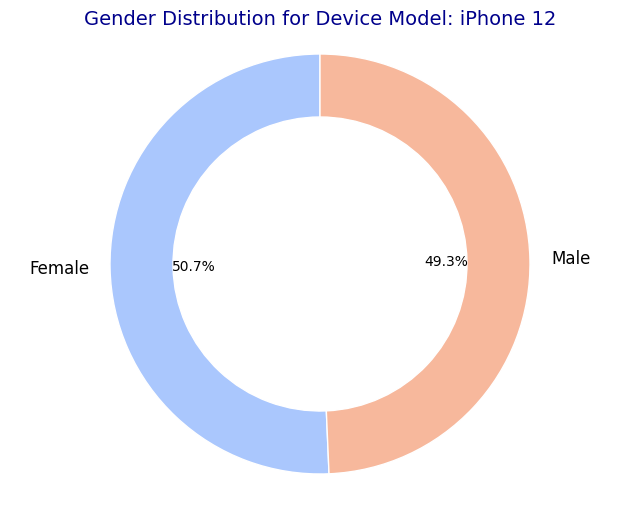

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by device model and gender, and count the number of users
device_gender_counts = df.groupby(['Device Model', 'Gender'])['User ID'].count().unstack()

# Fill NaN values with 0 (if a device model doesn't have a certain gender)
device_gender_counts = device_gender_counts.fillna(0)

# Define a color palette
colors = sns.color_palette("coolwarm", len(device_gender_counts.columns))

# Plot the donut chart for each device model
for device_model in device_gender_counts.index:
    gender_counts = device_gender_counts.loc[device_model]

    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.3, edgecolor='w')  # For donut chart
    )

    # Customize text styles
    plt.setp(autotexts, size=10, color="black")
    plt.setp(texts, size=12)

    # Add a circle in the center for the donut effect
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(center_circle)

    # Add title with custom formatting
    plt.title(
        f"Gender Distribution for Device Model: {device_model}",
        fontsize=14, color="darkblue"
    )

    # Equal aspect ratio ensures the pie is drawn as a circle
    plt.axis('equal')
    plt.show()

<ipython-input-8-925966d1bbed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='User Behavior Class', palette='viridis')


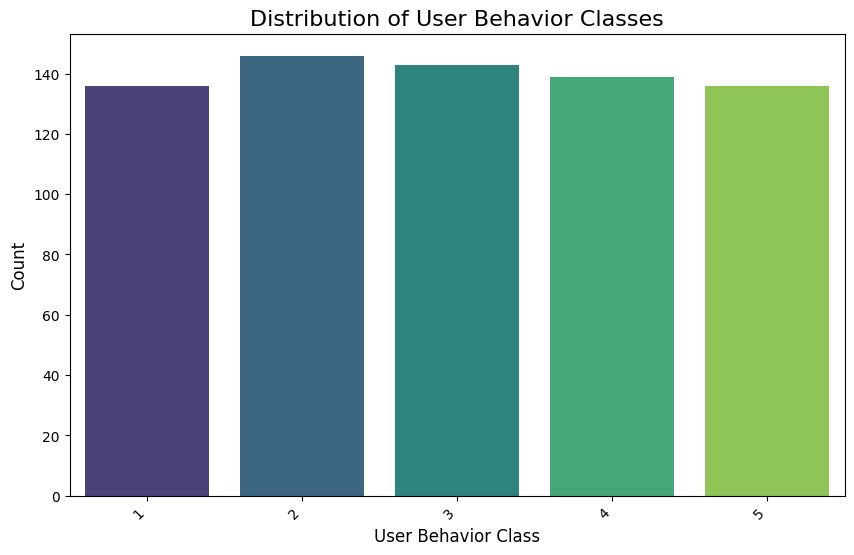

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='User Behavior Class', palette='viridis')
plt.title('Distribution of User Behavior Classes', fontsize=16)
plt.xlabel('User Behavior Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [ ]:
!pip install -q tensorflow
import tensorflow as tf

In [ ]:
X=df.drop(['User Behavior Class'],axis=1)
y=df['User Behavior Class']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=0)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 528 to 684
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     140 non-null    int64  
 1   Device Model                140 non-null    object 
 2   Operating System            140 non-null    object 
 3   App Usage Time (min/day)    140 non-null    int64  
 4   Screen On Time (hours/day)  140 non-null    float64
 5   Battery Drain (mAh/day)     140 non-null    int64  
 6   Number of Apps Installed    140 non-null    int64  
 7   Data Usage (MB/day)         140 non-null    int64  
 8   Age                         140 non-null    int64  
 9   Gender                      140 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 12.0+ KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 306 to 152
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     560 non-null    int64  
 1   Device Model                560 non-null    object 
 2   Operating System            560 non-null    object 
 3   App Usage Time (min/day)    560 non-null    int64  
 4   Screen On Time (hours/day)  560 non-null    float64
 5   Battery Drain (mAh/day)     560 non-null    int64  
 6   Number of Apps Installed    560 non-null    int64  
 7   Data Usage (MB/day)         560 non-null    int64  
 8   Age                         560 non-null    int64  
 9   Gender                      560 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 48.1+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_train = pd.get_dummies(X_train)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts strings to integers
one_hot_encoder = OneHotEncoder(sparse_output=False) # Changed 'sparse' to 'sparse_output'
y_train_onehot = one_hot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier=Sequential()

In [ ]:
df.columns.value_counts().sum()

11

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))  # Input layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))  # Hidden layer
classifier.add(Dense(units=y_train_onehot.shape[1], kernel_initializer='uniform', activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train,y_train_onehot,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2200 - loss: 1.6191 - val_accuracy: 0.2553 - val_loss: 1.6082
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2573 - loss: 1.5952 - val_accuracy: 0.2979 - val_loss: 1.5972
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2273 - loss: 1.5719 - val_accuracy: 0.1702 - val_loss: 1.5687
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2228 - loss: 1.5251 - val_accuracy: 0.1702 - val_loss: 1.5212
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2467 - loss: 1.4240 - val_accuracy: 0.1702 - val_loss: 1.4832
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2291 - loss: 1.4693 - val_accuracy: 0.2979 - val_loss: 1.4213
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4091 - loss: 1.3442 - val_accuracy: 0.3404 - val_loss: 1.3772
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4499 - loss: 1.2278 - val_accuracy: 0.3404 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
accuracy=model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

In [ ]:
for epoch in range(len(accuracy)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Accuracy: {accuracy[epoch]:.4f}")
    print(f"  Validation Accuracy: {val_accuracy[epoch]:.4f}")
    print(f"  Training Loss: {loss[epoch]:.4f}")
    print(f"  Validation Loss: {val_loss[epoch]:.4f}\n")


Epoch 1:
  Training Accuracy: 0.2473
  Validation Accuracy: 0.2553
  Training Loss: 1.6138
  Validation Loss: 1.6082

Epoch 2:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.2979
  Training Loss: 1.5947
  Validation Loss: 1.5972

Epoch 3:
  Training Accuracy: 0.2473
  Validation Accuracy: 0.1702
  Training Loss: 1.5638
  Validation Loss: 1.5687

Epoch 4:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1702
  Training Loss: 1.5028
  Validation Loss: 1.5212

Epoch 5:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1702
  Training Loss: 1.4276
  Validation Loss: 1.4832

Epoch 6:
  Training Accuracy: 0.3226
  Validation Accuracy: 0.2979
  Training Loss: 1.3718
  Validation Loss: 1.4213

Epoch 7:
  Training Accuracy: 0.3763
  Validation Accuracy: 0.3404
  Training Loss: 1.3029
  Validation Loss: 1.3772

Epoch 8:
  Training Accuracy: 0.4624
  Validation Accuracy: 0.3404
  Training Loss: 1.2472
  Validation Loss: 1.3176

Epoch 9:
  Training Accuracy: 0.5054
  Validation Accura

In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil pelatihan dan validasi
history_df = pd.DataFrame({
    'Epoch': range(1, len(accuracy) + 1),
    'Training Accuracy': accuracy,
    'Validation Accuracy': val_accuracy,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# Menampilkan tabel
print(history_df)


    Epoch  Training Accuracy  Validation Accuracy  Training Loss  \
0       1           0.247312             0.255319       1.613777   
1       2           0.236559             0.297872       1.594651   
2       3           0.247312             0.170213       1.563799   
3       4           0.236559             0.170213       1.502811   
4       5           0.236559             0.170213       1.427605   
..    ...                ...                  ...            ...   
95     96           0.731183             0.723404       0.566519   
96     97           0.795699             0.723404       0.544822   
97     98           0.774194             0.702128       0.543883   
98     99           0.795699             0.744681       0.543749   
99    100           0.731183             0.617021       0.567973   

    Validation Loss  
0          1.608247  
1          1.597164  
2          1.568729  
3          1.521175  
4          1.483161  
..              ...  
95         0.675759  
96     

In [ ]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │             102 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 539 (2.11 KB)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 360 (1.41 KB)

In [ ]:
classifier.get_weights()

[array([[-4.5302521e-02,  6.7340732e-02,  8.1177764e-03, -5.3619575e-02,
         -2.0925272e-02,  1.6462401e-02],
        [-6.8154819e-03, -5.7763215e-02,  1.1768824e-01,  3.1087333e-02,
         -2.7073562e-02,  9.5849045e-02],
        [ 1.9893054e-02, -7.3164217e-02,  1.4056267e-01,  1.0704732e-01,
          4.4051912e-02,  7.6105900e-02],
        [-9.5059387e-03,  4.0827356e-02,  1.4390465e-02,  1.4200756e-01,
         -2.2137225e-02, -1.4281243e-02],
        [ 4.5836568e-03,  1.3096866e-01, -6.5123938e-02,  1.2602268e-01,
          3.7739601e-02, -2.2610227e-02],
        [ 4.1442141e-03, -2.7331093e-02,  4.4191804e-02,  2.1787779e-02,
          1.8741932e-02,  9.5481515e-02],
        [ 4.8743930e-02,  5.5825853e-01, -5.0642425e-01, -2.7300763e-01,
          2.3745906e-02, -4.6768296e-01],
        [-3.9453432e-04,  5.2463174e-01, -5.4171056e-01, -5.2130401e-01,
         -4.2720366e-02, -5.3000641e-01],
        [ 5.6152716e-03,  4.7978759e-01, -2.1116039e-01,  8.4671132e-02,
       

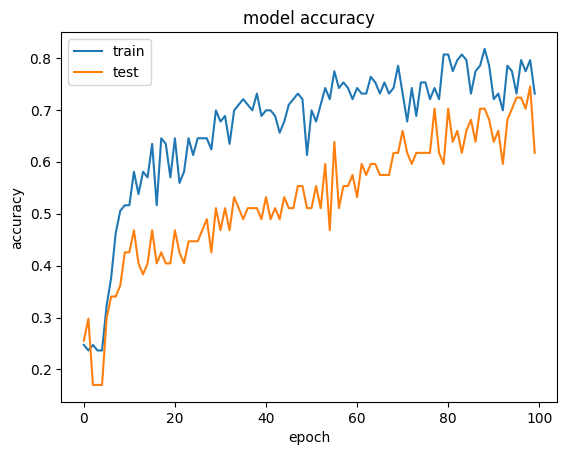

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

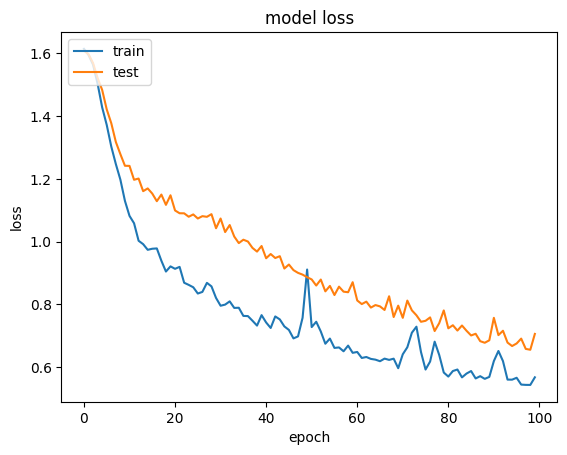

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Predicting the Test set results
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
 # Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[  0,   0,   0,   0,   0,   0],
       [100,  10,   0,   0,   0,   0],
       [ 19,  89,   3,   0,   0,   0],
       [  0,  67,  33,  17,   4,   0],
       [  0,   2,  30,  54,  26,   0],
       [  0,   0,   0,  13,  93,   0]])

akurasi total

In [ ]:
# Pastikan Anda sudah mengimpor LabelEncoder dan OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Encode label y_test menggunakan LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Mengubah label menjadi angka

# Lakukan one-hot encoding pada y_test yang sudah di-encode
# Ganti 'sparse' dengan 'sparse_output'
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Mengubah menjadi format one-hot encoding
y_test_onehot = one_hot_encoder.fit_transform(y_test_encoded.reshape(-1, 1))

# Sekarang, Anda dapat melakukan evaluasi pada data uji
test_loss, test_accuracy = classifier.evaluate(X_test, y_test_onehot, batch_size=10)

# Menampilkan hasil akurasi dan loss pada data uji
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6243 - loss: 0.7867
Test Loss: 0.7388
Test Accuracy: 65.89%


In [ ]:
# Prediksi kelas pada data uji
y_pred = classifier.predict(X_test)

# Mengambil kelas yang diprediksi (kelas dengan probabilitas tertinggi)
y_pred_classes = y_pred.argmax(axis=1)

# Menghitung akurasi secara manual
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_classes)

# Menampilkan hasil akurasi
print(f"Test Accuracy: {accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Accuracy: 10.00%
